In [43]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as  sns


In [5]:
(X_train,y_train),(X_test,y_test) =keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

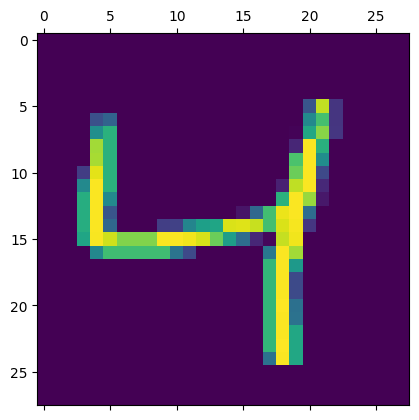

In [10]:
plt.matshow(X_train[2])

flatten the training data set to the single dimensional array

In [11]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train_flattern = X_train.reshape(len(X_train),28*28)
X_test_flattern = X_test.reshape(len(X_test),28*28)

In [22]:
X_test_flattern.shape


(10000, 784)

In [23]:
X_train_flattern.shape

(60000, 784)

create a simple neuron network

In [24]:
model = keras.Sequential([
 keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer='adam', 
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(X_train_flattern,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8091 - loss: 0.7291
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9131 - loss: 0.3097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9175 - loss: 0.2905
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9235 - loss: 0.2730
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9262 - loss: 0.2603


In [25]:
model.evaluate(X_test_flattern,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9103 - loss: 0.3075


[0.27139273285865784, 0.9221000075340271]

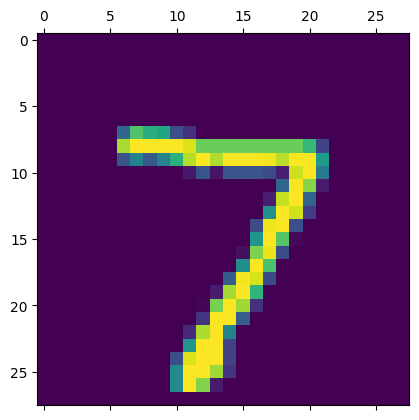

In [28]:
plt.matshow(X_test[0])

In [29]:
y_pred = model.predict(X_test_flattern)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([2.0402579e-02, 7.5899095e-07, 8.8688575e-02, 9.5730543e-01,
       2.8724479e-03, 1.9221522e-01, 1.8376001e-06, 9.9978632e-01,
       1.0484408e-01, 6.2294972e-01], dtype=float32)

In [32]:
np.argmax(y_pred[0])

np.int64(7)

In [34]:
y_pred_labels= [np.argmax(i)for i in y_pred]

In [35]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [39]:
y_pred_labels[0:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [47]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    7,    5,    2,    1,    0],
       [   0, 1120,    2,    2,    0,    1,    4,    2,    4,    0],
       [   5,   12,  931,   17,   11,    6,   11,   10,   26,    3],
       [   3,    1,   20,  908,    0,   42,    2,   12,   16,    6],
       [   1,    2,    5,    1,  927,    0,    9,    4,    9,   24],
       [   8,    2,    5,   28,    9,  801,   11,    5,   20,    3],
       [  13,    3,    8,    1,    7,   23,  899,    2,    2,    0],
       [   1,    8,   25,    5,   10,    1,    0,  950,    2,   26],
       [   9,   14,    8,   23,    9,   52,    9,   12,  833,    5],
       [  11,    7,    1,   11,   37,   12,    0,   32,    7,  891]],
      dtype=int32)>

Text(70.72222222222221, 0.5, 'Actual')

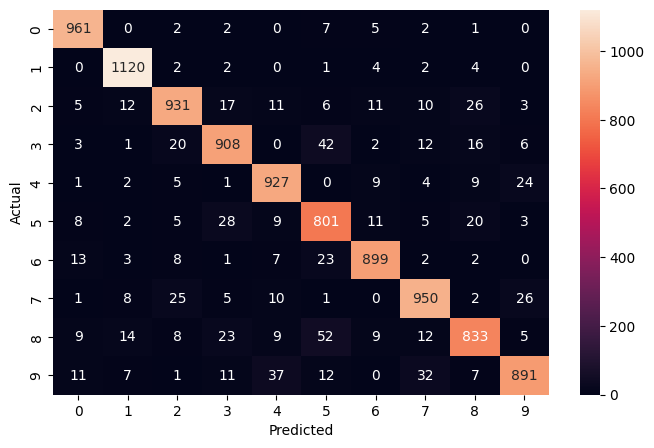

In [49]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Actual')

add a hidden layer

In [50]:
model = keras.Sequential([
 keras.layers.Dense(100,input_shape=(784,),activation="relu"),
 keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer='adam', 
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(X_train_flattern,y_train,epochs=5)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8683 - loss: 0.4632
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9625 - loss: 0.1261
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9764 - loss: 0.0814
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9818 - loss: 0.0604
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9856 - loss: 0.0469


In [51]:
model.evaluate(X_test_flattern,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - loss: 0.0908


[0.07947738468647003, 0.9763000011444092]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(70.72222222222221, 0.5, 'Actual')

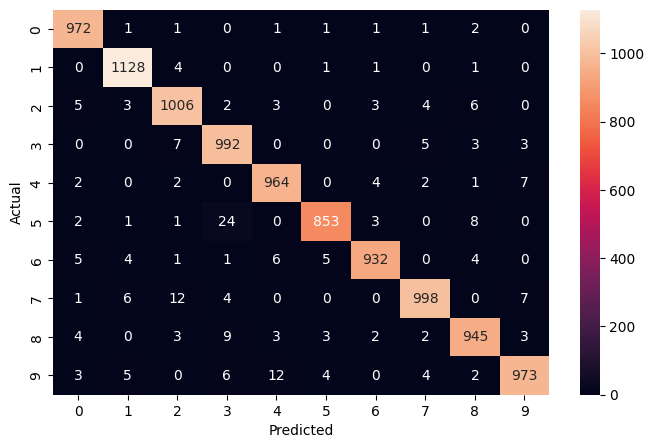

In [53]:
y_pred = model.predict(X_test_flattern)
y_pred_labels= [np.argmax(i)for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)


plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Actual')

In [55]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(100,activation="relu"),
 keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer='adam', 
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8776 - loss: 0.4420
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9638 - loss: 0.1262
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9754 - loss: 0.0850
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9810 - loss: 0.0631
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9861 - loss: 0.0462
